<div style="float:left;font-size:20px;">
    <h1>PCA</h1>
</div><div style="float:right;"><img src="../assets/banner.jpg"></div>

<hr>

Often datasets contain many data dimensions, making analysis time intensive and complex. Determining which of these data features is pertinent to the problem at hand can also be difficult. Principal component analysis (PCA) is an unsupervised machine learning technique that determines the hyperplane that best separates the data. 

The orthogonal unitvectors of this plane, known as _principal components_, describe the data directions that maximise the variance of data and hence the information content that is encoded. These principal components are linear combinations of the original dataset, ordered by their explained variance of the original data. Selecting the first few components after the PCA transform can reduce the amount of data dimensions whilst retaining much of the underyling encoded information.   

## PCA in practice - Sklearn

- Before performing PCA, the data must first be centered such that the mean of each dimension is zero. Sklearn's PCA will automatically perform this centering for you.
- The data however also needs to be normalised
- PCA Sklearn


In [10]:
import numpy as np
import sklearn as sk
import altair as alt
alt.data_transformers.disable_max_rows(); # Disable max rows == 5000 limitation
alt.data_transformers.enable('json');     # Save data to JSON, rather than to notebook to keep size small

## Wine dataset

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline

RANDOM_STATE = 42
FIG_SIZE = (10, 7)


features, target = load_wine(return_X_y=True)

# Make a train/test split using 30% test size
X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    test_size=0.30,
                                                    random_state=RANDOM_STATE)

# Fit to data and predict using pipelined GNB and PCA.
unscaled_clf = make_pipeline(PCA(n_components=2), GaussianNB())
unscaled_clf.fit(X_train, y_train)
pred_test = unscaled_clf.predict(X_test)

# Fit to data and predict using pipelined scaling, GNB and PCA.
std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), GaussianNB())
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)

# Show prediction accuracies in scaled and unscaled data.
print('\nPrediction accuracy for the normal test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test)))

print('\nPrediction accuracy for the standardized test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_std)))


Prediction accuracy for the normal test dataset with PCA
81.48%


Prediction accuracy for the standardized test dataset with PCA
98.15%



In [15]:
# Extracting PCA from pipeline
pca = unscaled_clf.named_steps['pca']
pca_std = std_clf.named_steps['pca']

# Show first principal components
print('\nPC 1 without scaling:\n', pca.components_[0])
print('\nPC 1 with scaling:\n', pca_std.components_[0])


PC 1 without scaling:
 [ 1.76342917e-03 -8.35544737e-04  1.54623496e-04 -5.31136096e-03
  2.01663336e-02  1.02440667e-03  1.53155502e-03 -1.11663562e-04
  6.31071580e-04  2.32645551e-03  1.53606718e-04  7.43176482e-04
  9.99775716e-01]

PC 1 with scaling:
 [ 0.13443023 -0.25680248 -0.0113463  -0.23405337  0.15840049  0.39194918
  0.41607649 -0.27871336  0.33129255 -0.11383282  0.29726413  0.38054255
  0.27507157]


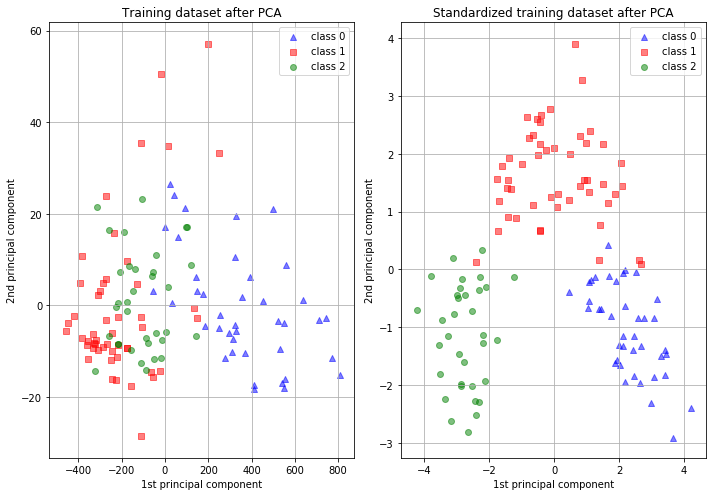

In [16]:
# Use PCA without and with scale on X_train data for visualization.
X_train_transformed = pca.transform(X_train)
scaler = std_clf.named_steps['standardscaler']
X_train_std_transformed = pca_std.transform(scaler.transform(X_train))

# visualize standardized vs. untouched dataset with PCA performed
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=FIG_SIZE)

for l, c, m in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax1.scatter(X_train_transformed[y_train == l, 0],
                X_train_transformed[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

for l, c, m in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax2.scatter(X_train_std_transformed[y_train == l, 0],
                X_train_std_transformed[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

ax1.set_title('Training dataset after PCA')
ax2.set_title('Standardized training dataset after PCA')

for ax in (ax1, ax2):
    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.legend(loc='upper right')
    ax.grid()

plt.tight_layout()

## Incremental PCA for large datasets

In [ ]:
from sklearn.decomposition import IncrementalPCA
n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)
X_reduced = inc_pca.transform(X_train)

## Iris dataset

In [47]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
iris = datasets.load_iris()

X = iris.data
y = iris.target
labels = {i: name for i, name in enumerate(iris.target_names)}

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

std_pca_pipe = make_pipeline(StandardScaler(), PCA())
std_pca_pipe.fit(X_train)
# Need to use named_steps['pca'] to get PCA from the pipeline
std_pca = std_pca_pipe.named_steps['pca']

cumsum = np.cumsum(std_pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

Number of dimensions to cover 95% of the variance
=> Only 2/4 = 50% of all PCA dimensions cover 95% of all information

In [40]:
d

2

=> 92.7% of information is in first PCA component, 5.2% in second

In [48]:
std_pca.explained_variance_ratio_

array([0.7290017 , 0.22922196, 0.03614846, 0.00562788])

Text(0, 0.5, 'Explained Variance')

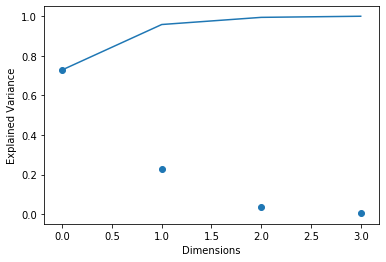

In [57]:
dimensions = np.arange(len(cumsum)) 
plt.plot(dimensions, cumsum)
plt.scatter(dimensions, std_pca.explained_variance_ratio_)
plt.xlabel('Dimensions')
plt.ylabel('Explained Variance')

In [49]:
std_pca.components_

array([[ 0.51762309, -0.27406975,  0.580167  ,  0.56600208],
       [ 0.39432373,  0.9167148 ,  0.02235678,  0.06035678],
       [-0.71925198,  0.26452205,  0.15958263,  0.62228454],
       [-0.24341676,  0.12061437,  0.79839827, -0.53736454]])

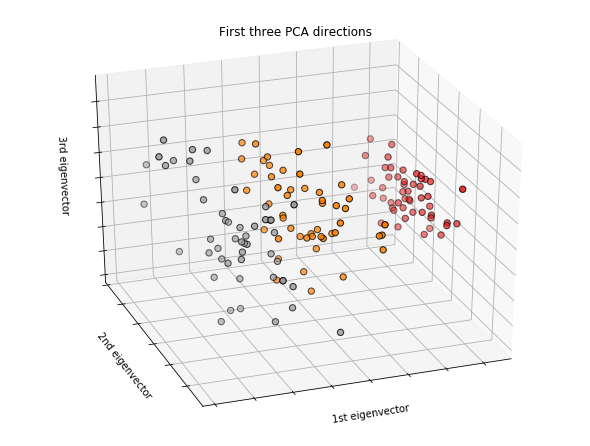

In [50]:
# NOTE: The below code does not scale the dataset
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data) # Iris dataset projected along the first three PCA eigenvectors
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
plt.show()

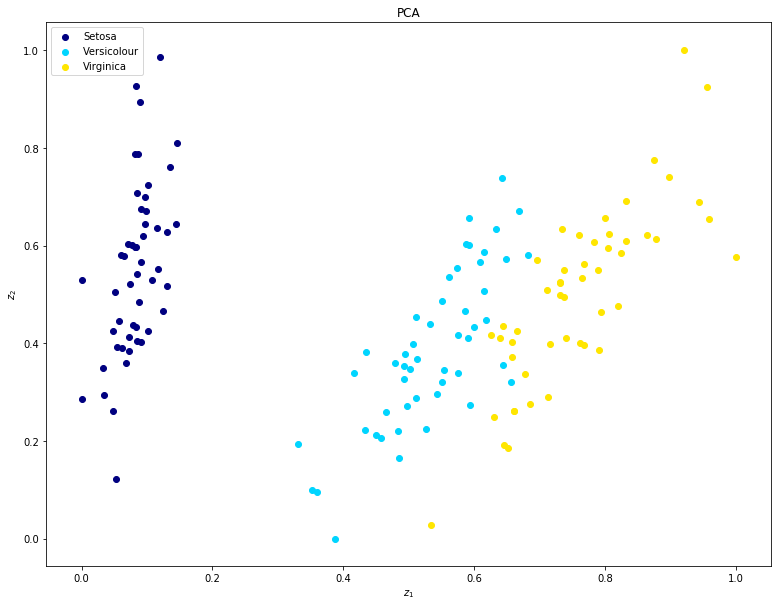

In [25]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib as mpl
def plot_irises(X, y, algo, min_distance=0.05, figsize=(13, 10)):
    # Let's scale the input features so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
    # Now we create the list of coordinates of the irises plotted so far.
    # We pretend that one is already plotted far away at the start, to
    # avoid `if` statements in the loop below
    neighbors = np.array([[10., 10.]])
    # The rest should be self-explanatory
    plt.figure(figsize=figsize)
    cmap = mpl.cm.get_cmap("jet")
    irises = np.unique(y)
    for iris in irises:
        plt.scatter(X_normalized[y == iris, 0], X_normalized[y == iris, 1], c=[cmap(iris / 3)],
                    label=labels[iris])
    plt.xlabel('$z_{1}$')
    plt.ylabel('$z_{2}$')
    plt.title(algo)
    # plt.axis("off")
    # ax = plt.gcf().gca()  # get current axes in current figure
    # for index, image_coord in enumerate(X_normalized):
    #     closest_distance = np.linalg.norm(np.array(neighbors) - image_coord, axis=1).min()
    #     if closest_distance > min_distance:
    #         neighbors = np.r_[neighbors, [image_coord]]
    #         plt.text(image_coord[0], image_coord[1], str(labels[y[index]]),
    #                  color=cmap(y[index] / 9), fontdict={"weight": "bold", "size": 6})

    plt.legend()
    
from sklearn.decomposition import PCA
X_pca_reduced = PCA(n_components=2, random_state=42).fit_transform(X)
plot_irises(X_pca_reduced, y, 'PCA')

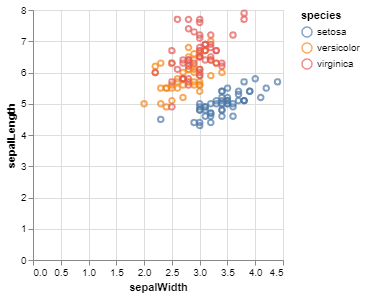

In [6]:
from vega_datasets import data

source = data.iris()
brush = alt.selection(type='interval', resolve='global')

base = alt.Chart(source).mark_point().encode(
    x='sepalWidth',
    y='sepalLength',
    color=alt.condition(brush, 'species', alt.ColorValue('gray')),
).add_selection(
    brush
).properties(
    width=250,
    height=250
)
base.display()

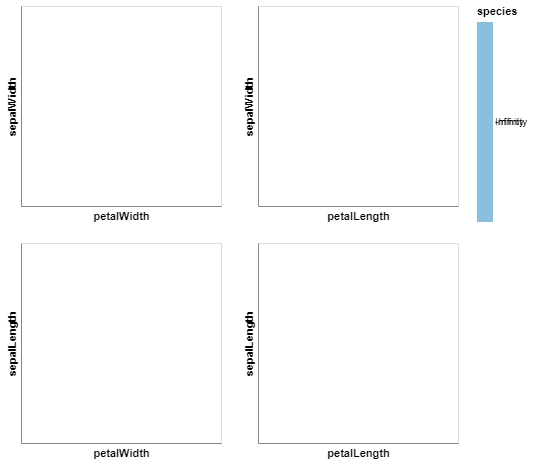

In [11]:
source = data.iris()

alt.Chart(source).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color='species:Q'
).properties(
    width=200,
    height=200
).repeat(
    row=['sepalWidth', 'sepalLength'],
    column=['petalWidth', 'petalLength']
).interactive()

In [5]:
X.info()

AttributeError: 'numpy.ndarray' object has no attribute 'info'

### Importance of feature scaling
https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html
Demonstrates that the performance of PCA is severely degraded if the data is not normalised first.

Automatically created module for IPython interactive environment

Prediction accuracy for the normal test dataset with PCA
81.48%


Prediction accuracy for the standardized test dataset with PCA
98.15%


PC 1 without scaling:
 [ 1.76342917e-03 -8.35544737e-04  1.54623496e-04 -5.31136096e-03
  2.01663336e-02  1.02440667e-03  1.53155502e-03 -1.11663562e-04
  6.31071580e-04  2.32645551e-03  1.53606718e-04  7.43176482e-04
  9.99775716e-01]

PC 1 with scaling:
 [ 0.13443023 -0.25680248 -0.0113463  -0.23405337  0.15840049  0.39194918
  0.41607649 -0.27871336  0.33129255 -0.11383282  0.29726413  0.38054255
  0.27507157]


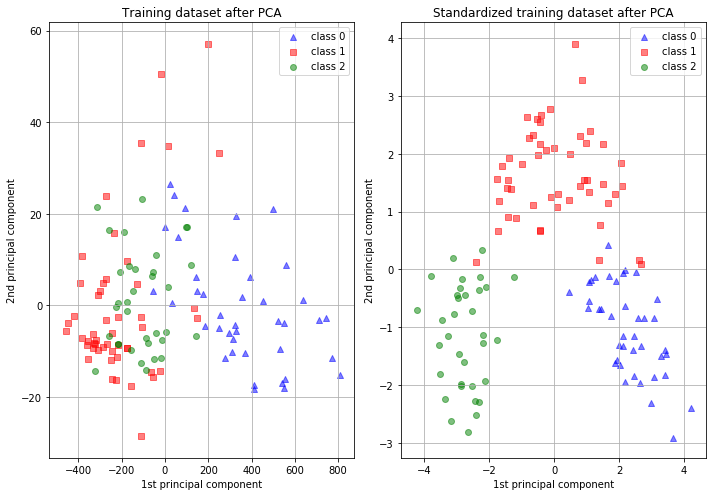

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline
print(__doc__)

# Code source: Tyler Lanigan <tylerlanigan@gmail.com>
#              Sebastian Raschka <mail@sebastianraschka.com>

# License: BSD 3 clause

RANDOM_STATE = 42
FIG_SIZE = (10, 7)


features, target = load_wine(return_X_y=True)

# Make a train/test split using 30% test size
X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    test_size=0.30,
                                                    random_state=RANDOM_STATE)

# Fit to data and predict using pipelined GNB and PCA.
unscaled_clf = make_pipeline(PCA(n_components=2), GaussianNB())
unscaled_clf.fit(X_train, y_train)
pred_test = unscaled_clf.predict(X_test)

# Fit to data and predict using pipelined scaling, GNB and PCA.
std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), GaussianNB())
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)

# Show prediction accuracies in scaled and unscaled data.
print('\nPrediction accuracy for the normal test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test)))

print('\nPrediction accuracy for the standardized test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_std)))

# Extract PCA from pipeline
pca = unscaled_clf.named_steps['pca']
pca_std = std_clf.named_steps['pca']

# Show first principal components
print('\nPC 1 without scaling:\n', pca.components_[0])
print('\nPC 1 with scaling:\n', pca_std.components_[0])

# Use PCA without and with scale on X_train data for visualization.
X_train_transformed = pca.transform(X_train)
scaler = std_clf.named_steps['standardscaler']
X_train_std_transformed = pca_std.transform(scaler.transform(X_train))

# visualize standardized vs. untouched dataset with PCA performed
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=FIG_SIZE)


for l, c, m in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax1.scatter(X_train_transformed[y_train == l, 0],
                X_train_transformed[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

for l, c, m in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax2.scatter(X_train_std_transformed[y_train == l, 0],
                X_train_std_transformed[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

ax1.set_title('Training dataset after PCA')
ax2.set_title('Standardized training dataset after PCA')

for ax in (ax1, ax2):
    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.legend(loc='upper right')
    ax.grid()

plt.tight_layout()
